<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Modeling Walkthrough

_Authors: Riley Dallas (AUS)_

---

### Learning Objectives
*After this lesson, you will be able to:*

- Gather, clean, explore and model a dataset from scratch.
- Split data into testing and training sets using both train/test split and cross-validation and apply both techniques to score a model.
- Evaluate several models.


## Importing libaries
---

We'll need the following libraries for today's lesson:

1. `pandas`
2. `numpy`
3. `seaborn`
4. `matplotlib.pyplot`
4. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
5. `LinearRegression`, `LassoCV` and `RidgeCV` from `sklearn`'s `linear_model` module
6. `StandardScaler` from `sklearn`'s `preprocessing` module
7. `r2_score` from `sklearn`'s `metrics` module 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# Part I:Build the model base on train data

## Load the Data

---

In [2]:
df = pd.read_csv('./datasets/train.csv')
df_t = pd.read_csv('./datasets/test.csv')
df_s = pd.read_csv('./datasets/sample_sub_reg.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


###### Order: Observation number
PID: Parcel identification number - can be used with city web site for parcel review.
MS SubClass: Identifies the type of dwelling involved in the sale.
MS Zoning: Identifies the general zoning classification of the sale.
Lot Frontage: Linear feet of street connected to property
Lot Area: Lot size in square feet
Street: Type of road access to property
Alley: Type of alley access to property
Lot Shape: General shape of property
Land Contour: Flatness of the property
Utilities: Type of utilities available
Lot Config: Lot configuration
Land Slope: Slope of property
Neighborhood: Physical locations within Ames city limits (map available)
Condition 1: Proximity to various conditions
Condition 2: Proximity to various conditions (if more than one is present)
Bldg Type: Type of dwelling
House Style: Style of dwelling
Overall Qual: Rates the overall material and finish of the house
Overall Cond: Rates the overall condition of the house
Year Built: Original construction date
Year Remod/Add: Remodel date (same as construction date if no remodeling or additions)
Roof Style: Type of roof
Roof Matl: Roof material
Exterior 1: Exterior covering on house
Exterior 2: Exterior covering on house (if more than one material)
Mas Vnr Type: Masonry veneer type
Mas Vnr Area: Masonry veneer area in square feet
Exter Qual: Evaluates the quality of the material on the exterior
Exter Cond: Evaluates the present condition of the material on the exterior
Foundation: Type of foundation
Bsmt Qual: Evaluates the height of the basement
Bsmt Cond: Evaluates the general condition of the basement
Bsmt Exposure: Refers to walkout or garden level walls
BsmtFin Type 1: Rating of basement finished area
BsmtFin SF 1: Type 1 finished square feet
BsmtFinType 2: Rating of basement finished area (if multiple types)
BsmtFin SF 2: Type 2 finished square feet
Bsmt Unf SF: Unfinished square feet of basement area
Total Bsmt SF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
Central Air: Central air conditioning
Electrical: Electrical system
1st Flr SF: First Floor square feet
2nd Flr SF: Second floor square feet
Low Qual Fin SF: Low quality finished square feet (all floors)
Gr Liv Area: Above grade (ground) living area square feet
Bsmt Full Bath: Basement full bathrooms
Bsmt Half Bath: Basement half bathrooms
Full Bath: Full bathrooms above grade
Half Bath: Half baths above grade
Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
Kitchen: Kitchens above grade
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality (Assume typical unless deductions are warranted)
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
Garage Type: Garage location
Garage Yr Blt: Year garage was built
Garage Finish: Interior finish of the garage
Garage Cars: Size of garage in car capacity
Garage Area: Size of garage in square feet
Garage Qual: Garage quality
Garage Cond: Garage condition
Paved Drive: Paved driveway
Wood Deck SF: Wood deck area in square feet
Open Porch SF: Open porch area in square feet
Enclosed Porch: Enclosed porch area in square feet
3-Ssn Porch: Three season porch area in square feet
Screen Porch: Screen porch area in square feet
Pool Area: Pool area in square feet
Pool QC: Pool quality
Fence: Fence quality
Misc Feature: Miscellaneous feature not covered in other categories
Misc Val: $Value of miscellaneous feature
Mo Sold: Month Sold
Yr Sold: Year Sold
Sale Type: Type of sale
Sale Condition: Condition of sale

In [4]:
df.columns = df.columns.str.replace(' ', '')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id               2051 non-null int64
PID              2051 non-null int64
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1721 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            140 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemod/Add    2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-n

In [6]:
df['PoolQC'] = df['PoolQC'].replace({np.nan: 'No pool'})
df['MiscFeature'] = df['MiscFeature'].replace({np.nan: 'No misc. features'})
df['Fence'] = df['Fence'].replace({np.nan: 'No fence'})

In [7]:
df['Alley'] = df['Alley'].replace({np.nan: 'No alley'})
df['FireplaceQu'] = df['FireplaceQu'].replace({np.nan: 'No fireplace'})
df['GarageFinish'] = df['GarageFinish'].replace({np.nan: 'No garage'})
df['GarageCond'] = df['GarageCond'].replace({np.nan: 'No garage'})
df['GarageQual'] = df['GarageQual'].replace({np.nan: 'No garage'})
df['GarageType'] = df['GarageType'].replace({np.nan: 'No garage'})
df['BsmtCond'] = df['BsmtCond'].replace({np.nan: 'No basement'})
df['BsmtExposure'] = df['BsmtExposure'].replace({np.nan: 'No basement'})
df['BsmtQual'] = df['BsmtQual'].replace({np.nan: 'No basement'})
df['BsmtFinType2'] = df['BsmtFinType2'].replace({np.nan: 'No basement'})
df['BsmtFinType1'] = df['BsmtFinType1'].replace({np.nan: 'No basement'})
df['MasVnrType'] = df['MasVnrType'].replace({np.nan: 'No masonry'})

In [8]:
pd.set_option('display.max_rows',90) #show entire data

In [9]:
df.isnull().sum()

Id                 0
PID                0
MSSubClass         0
MSZoning           0
LotFrontage      330
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemod/Add      0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        22
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea    

In [10]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)

In [11]:
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mean())

In [12]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mean())

In [13]:
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mean()) 

In [14]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mean())

In [15]:
df['GarageCars'] = df['GarageCars'].fillna(df['GarageCars'].mean())

In [16]:
df['GarageArea'] = df['GarageArea'].fillna(df['GarageArea'].mean())

In [17]:
df.isnull().sum()

Id               0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

# Explore the data

In [18]:
print('Data from years {} to {}.'.format(df['YrSold'].min(), df['YrSold'].max()))

Data from years 2006 to 2010.


In [19]:
df.shape

(2051, 81)

In [20]:
df.columns

Index(['Id', 'PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [21]:
df.to_csv('amesdf.csv')

In [22]:
#df=pd.read_csv('amesdf.csv')

## Heatmap

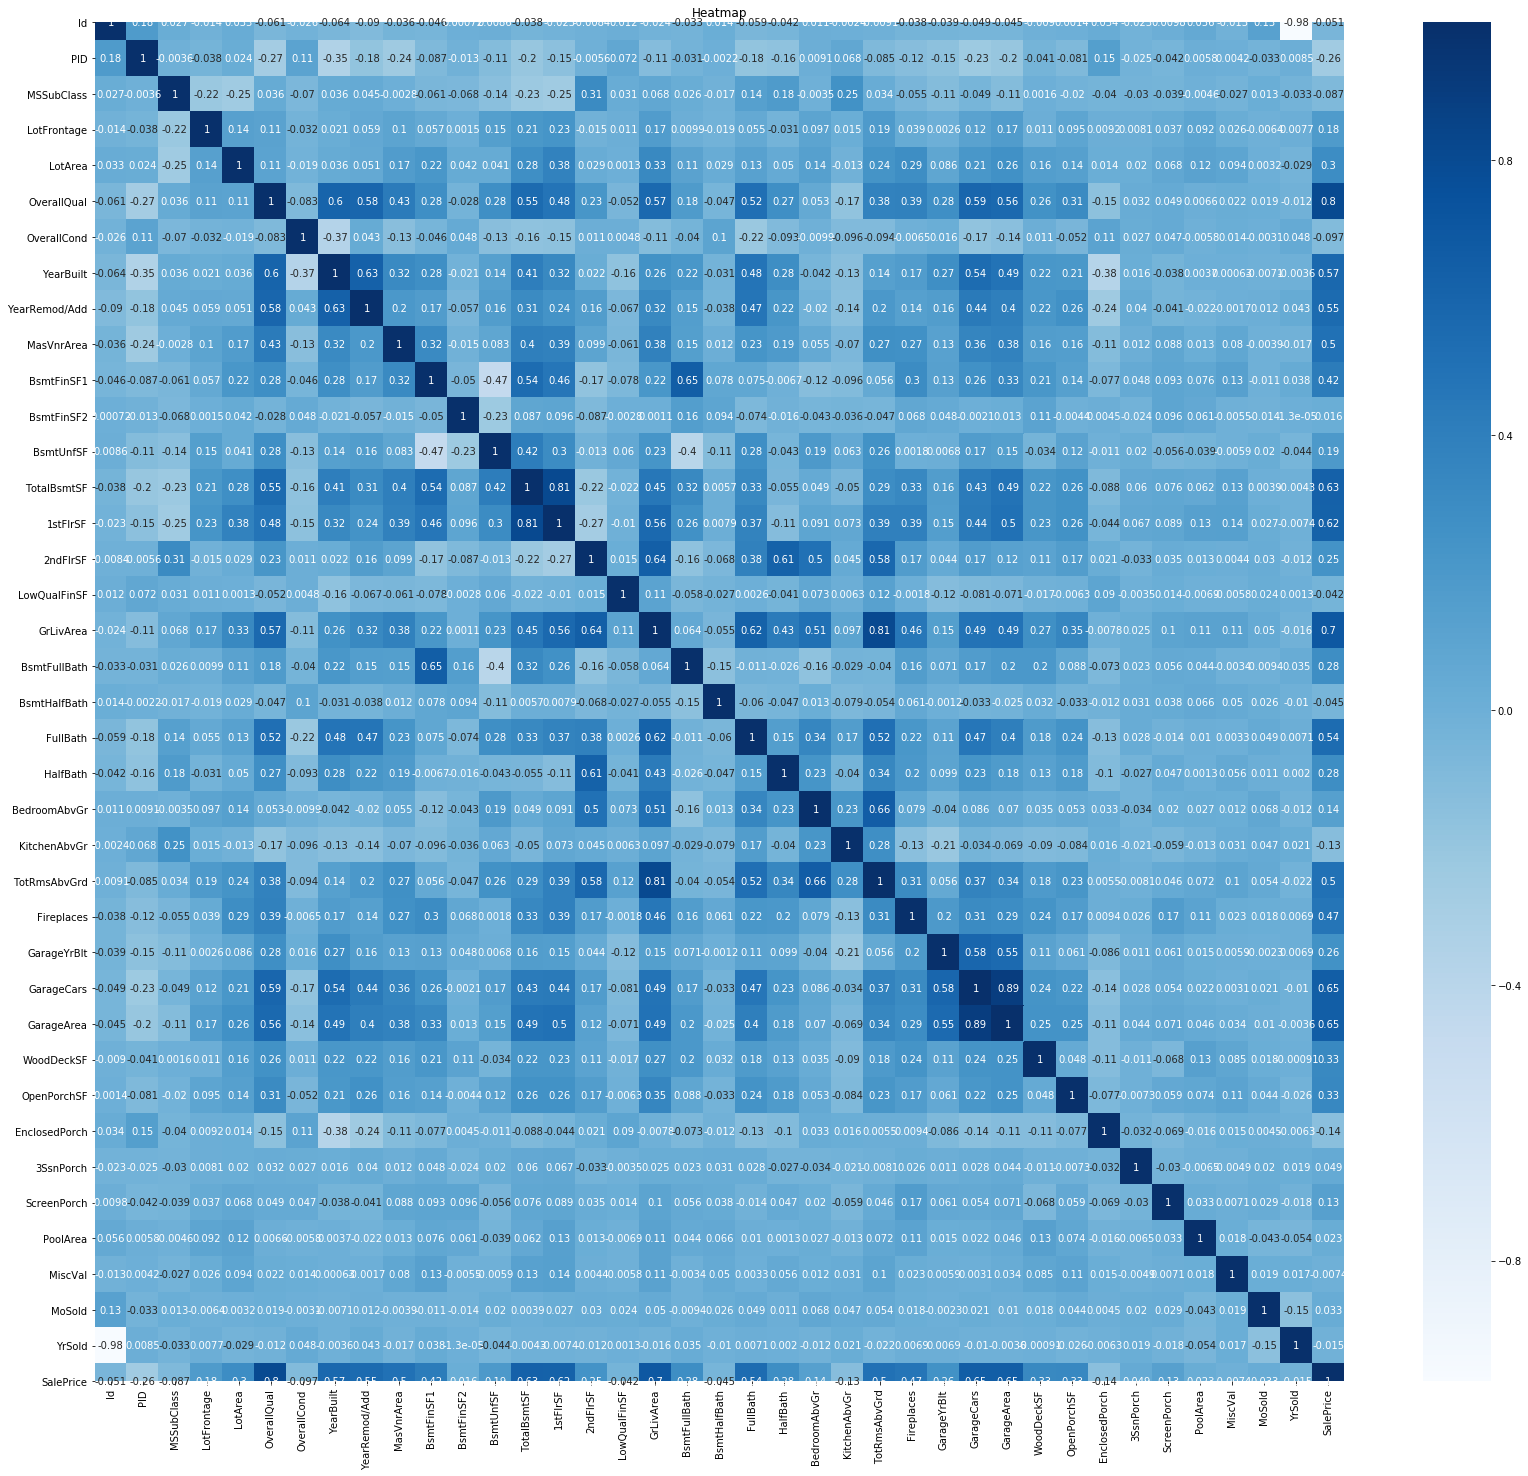

In [23]:
plt.figure(figsize = (28,25))
plt.title('Heatmap')
sns.heatmap(df.corr(),annot=True, cmap='Blues')
plt.savefig('Heatmap.png')


In [24]:
df.select_dtypes('float').columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [25]:
df.select_dtypes('int').columns

Index(['Id', 'PID', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemod/Add', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [26]:
df.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

###### Dummy all the category columns and put back to the table together with numerical columns

In [27]:
df0=pd.get_dummies(df, prefix=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'])

In [28]:
df0.shape

(2051, 307)

In [29]:
df0.head()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,109,533352170,60,0.0,13517,6,8,1976,2005,289.0,...,0,0,0,0,0,0,0,0,0,1
1,544,531379050,60,43.0,11492,7,5,1996,1997,132.0,...,0,0,0,0,0,0,0,0,0,1
2,153,535304180,20,68.0,7922,5,7,1953,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
3,318,916386060,60,73.0,9802,5,5,2006,2007,0.0,...,0,0,0,0,0,0,0,0,0,1
4,255,906425045,50,82.0,14235,6,8,1900,1993,0.0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
df0.columns

Index(['Id', 'PID', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemod/Add', 'MasVnrArea',
       ...
       'MiscFeature_TenC', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD '],
      dtype='object', length=307)

## Find the coef for dummies and drop some category features

In [31]:
'''df0=pd.get_dummies(df.loc[:,'Neighborhood'])
y=df['SalePrice']
df0.shape
result = pd.concat([df0, y], axis=1, sort=False)'''
#Base on experience, neighbourhood is definetely important for the housing price.
#So,first dummy neighbour to find the highest corr(Xi,y)

"df0=pd.get_dummies(df.loc[:,'Neighborhood'])\ny=df['SalePrice']\ndf0.shape\nresult = pd.concat([df0, y], axis=1, sort=False)"

###### Take out all the category columns together with target(SalePrice)

In [32]:
df1=df0.loc[:,'MSZoning_A (agr)':'SaleType_WD ']

or:
#df0.columns.get_loc('MSZoning_A (agr)')
#df1=df0.iloc[:,39:307]

In [33]:
result1 = pd.concat([df1, df0['SalePrice']], axis=1, sort=False)

In [34]:
result2=abs(result1.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

In [35]:
j=0
for i in range(len(result2.index)):
    if result2['SalePrice'][i]>0.25:
        j+=1
print(j)

41


In [36]:
result2.head(41).index

Index(['SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA', 'Foundation_PConc', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'BsmtQual_TA',
       'HeatingQC_Ex', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'GarageFinish_Unf', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'GarageType_Attchd', 'Foundation_CBlock',
       'HeatingQC_TA', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_Stone', 'LotShape_Reg', 'KitchenQual_Gd', 'BsmtExposure_No',
       'PavedDrive_Y', 'MSZoning_RM', 'CentralAir_N', 'CentralAir_Y',
       'PavedDrive_N', 'LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'MasVnrType_BrkFace', 'Neighborhood_StoneBr',
       'Electrical_SBrkr'],
      dtype='object')

In [37]:
df2=df0[['ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex',
       'KitchenQual_TA', 'Foundation_PConc', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'BsmtQual_TA',
       'HeatingQC_Ex', 'Neighborhood_NridgHt', 'ExterQual_Gd',
       'GarageFinish_Unf', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'GarageType_Attchd', 'Foundation_CBlock',
       'HeatingQC_TA', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_Stone', 'LotShape_Reg', 'KitchenQual_Gd', 'BsmtExposure_No',
       'PavedDrive_Y', 'MSZoning_RM', 'CentralAir_N', 'CentralAir_Y',
       'PavedDrive_N', 'LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'MasVnrType_BrkFace', 'Neighborhood_StoneBr',
       'Electrical_SBrkr']]

In [38]:
#result2.corr()

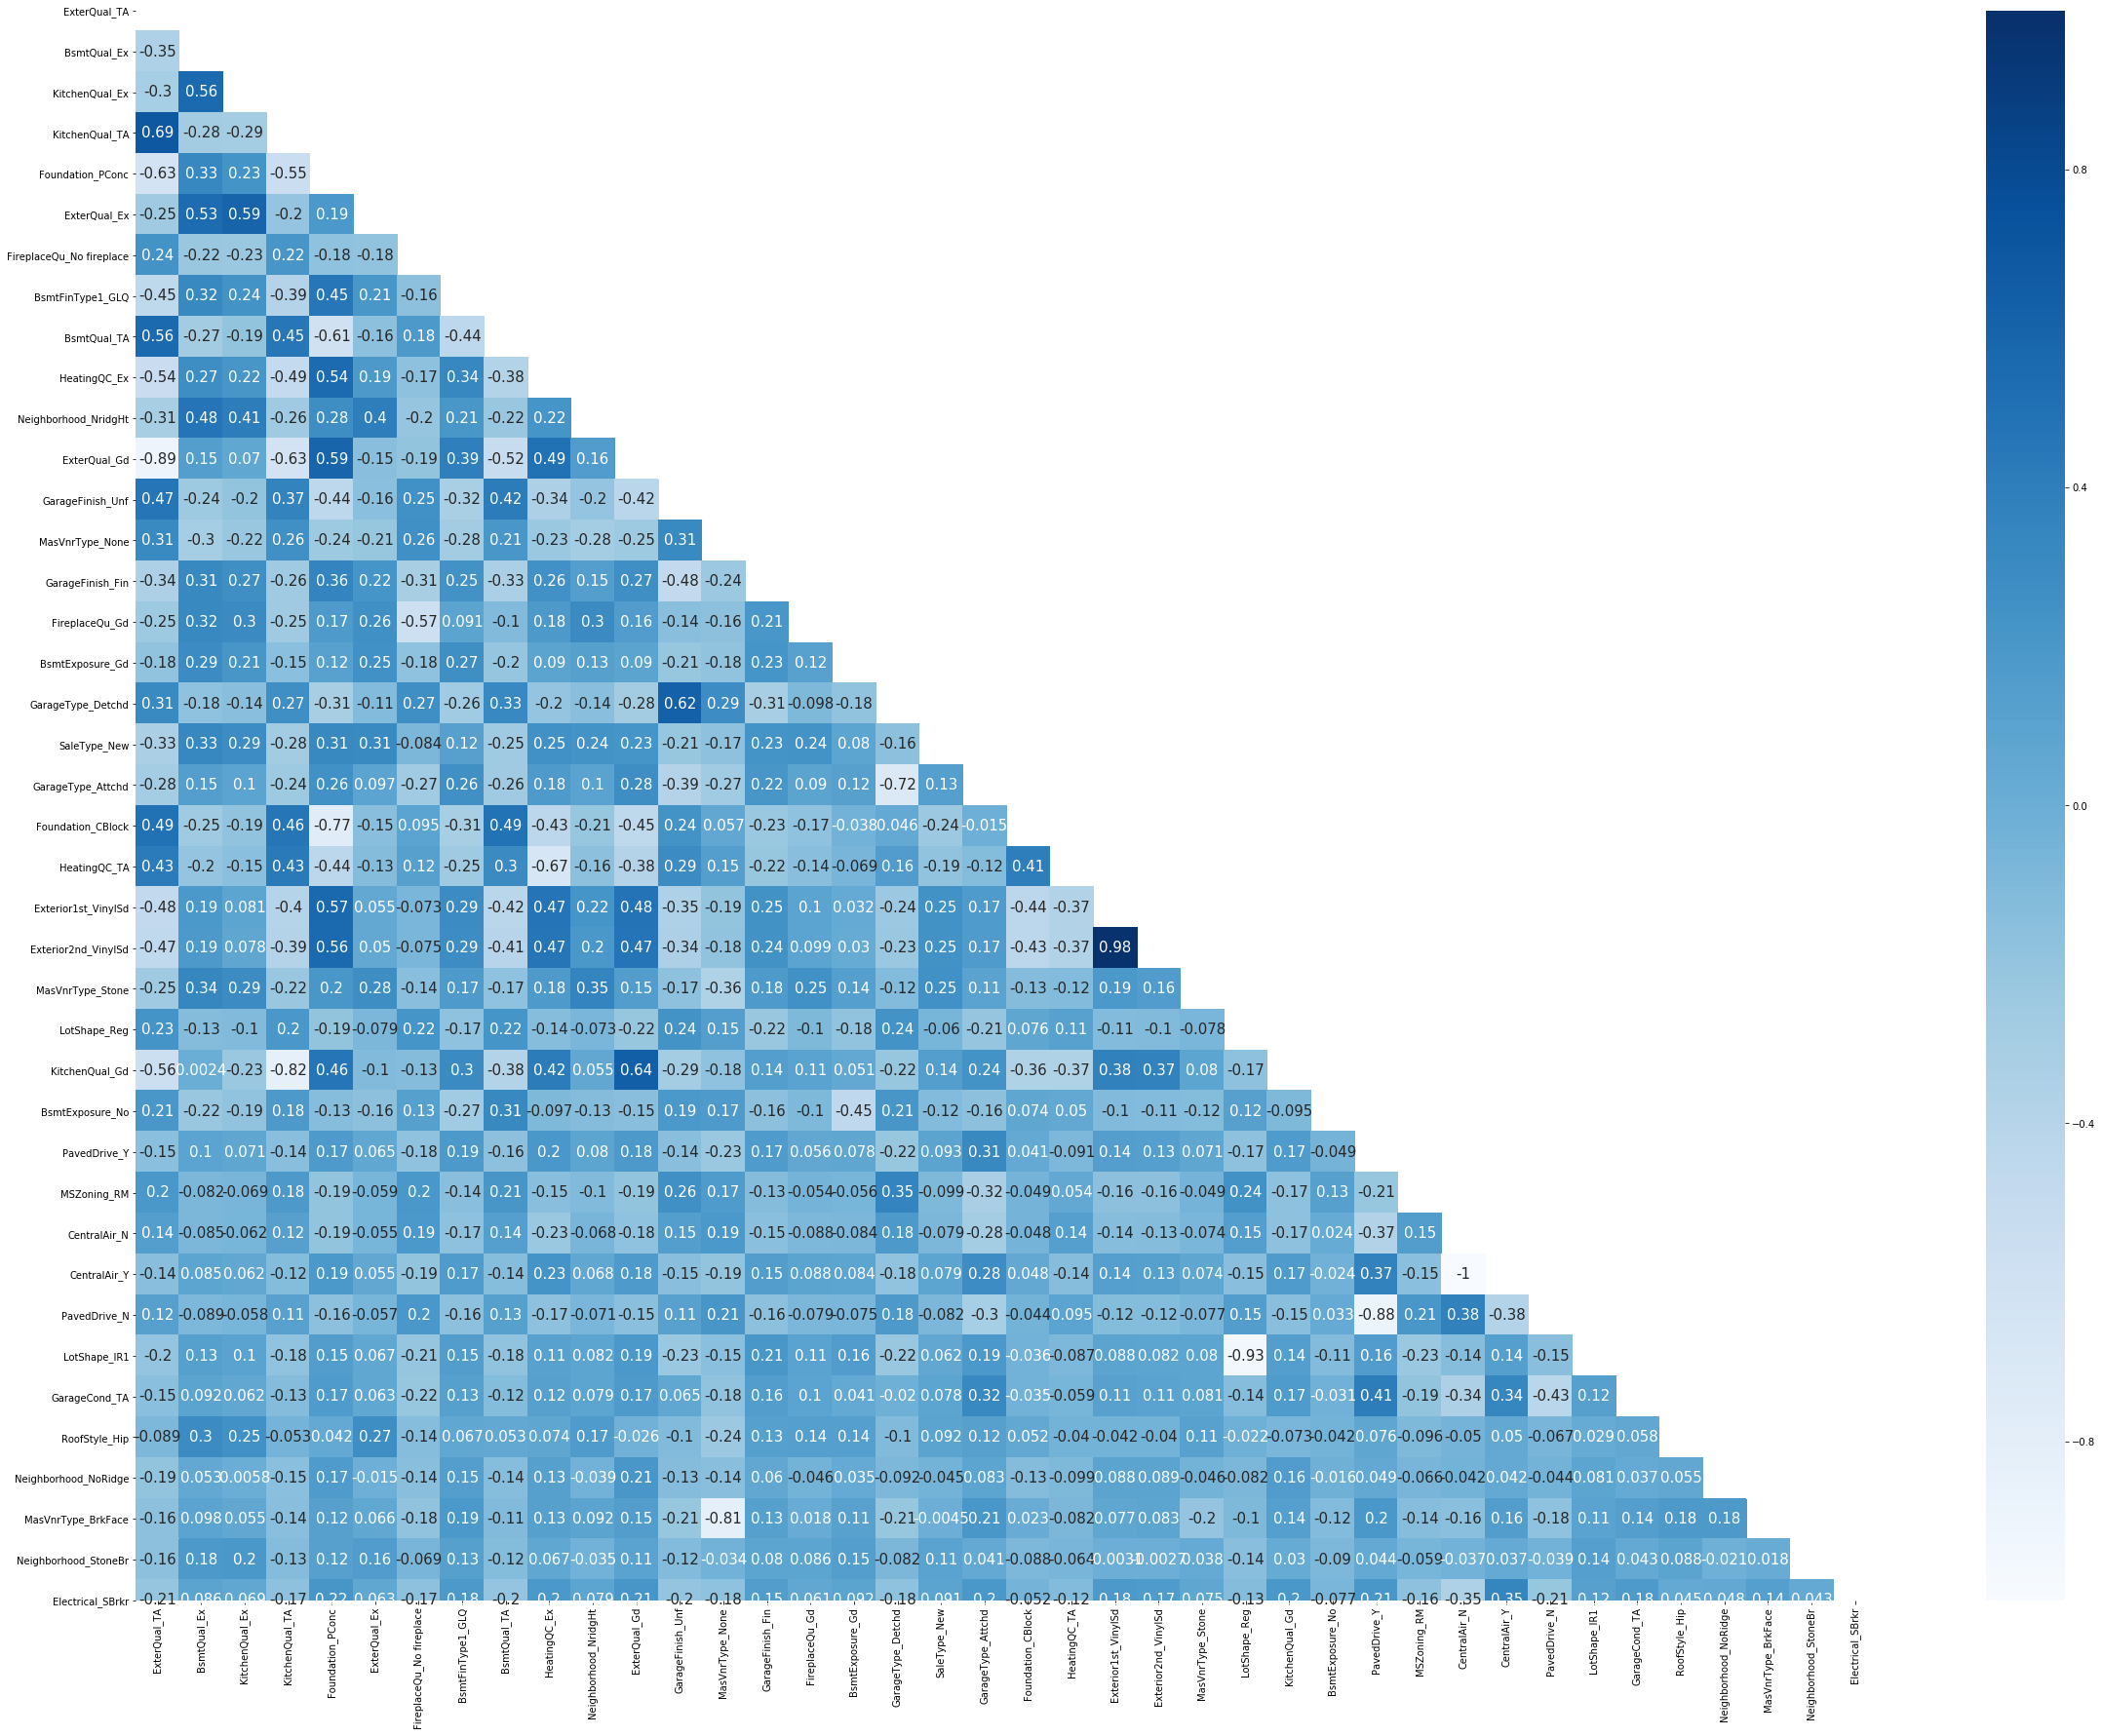

In [39]:
plt.figure(figsize = (40,30))
#plt.title('Heatmap')
matrix = np.triu(df2.corr())
sns.heatmap(df2.corr(),annot=True, mask = matrix, annot_kws={"size": 15},cmap='Blues')
#plt.savefig('Heatmap.png')

In [40]:
#g = sns.pairplot(result2, hue="species")

###### Drop X with high corr(Xi,Xj)

In [41]:
abs(df2.corr()[['ExterQual_TA']]).sort_values('ExterQual_TA', ascending=False).head()

,ExterQual_TA
ExterQual_TA,1.000000
ExterQual_Gd,0.893536
KitchenQual_TA,0.690116
Foundation_PConc,0.626157
KitchenQual_Gd,0.562414


In [42]:
#use 0.7 sthreshold to drop high corr between to Xi

In [43]:
drop_categry=['ExterQual_Gd']

In [44]:
abs(df2.corr()[['KitchenQual_TA']]).sort_values('KitchenQual_TA', ascending=False).head()

,KitchenQual_TA
KitchenQual_TA,1.000000
KitchenQual_Gd,0.821655
ExterQual_TA,0.690116
ExterQual_Gd,0.627659
Foundation_PConc,0.550170


In [45]:
drop_categry.append('KitchenQual_Gd')

In [46]:
abs(df2.corr()[['Foundation_PConc']]).sort_values('Foundation_PConc', ascending=False).head()

,Foundation_PConc
Foundation_PConc,1.000000
Foundation_CBlock,0.773262
ExterQual_TA,0.626157
BsmtQual_TA,0.608061
ExterQual_Gd,0.588106


In [47]:
drop_categry.append('Foundation_CBlock')

In [48]:
abs(df2.corr()[['MasVnrType_None']]).sort_values('MasVnrType_None', ascending=False).head()

,MasVnrType_None
MasVnrType_None,1.000000
MasVnrType_BrkFace,0.805146
MasVnrType_Stone,0.361186
GarageFinish_Unf,0.310037
ExterQual_TA,0.305972


In [49]:
drop_categry.append('MasVnrType_BrkFace')

In [50]:
abs(df2.corr()[['GarageType_Detchd']]).sort_values('GarageType_Detchd', ascending=False).head()

,GarageType_Detchd
GarageType_Detchd,1.000000
GarageType_Attchd,0.715623
GarageFinish_Unf,0.619872
MSZoning_RM,0.354778
BsmtQual_TA,0.325230


In [51]:
drop_categry.append('GarageType_Attchd')

In [52]:
abs(df2.corr()[['Foundation_CBlock']]).sort_values('Foundation_CBlock', ascending=False).head()

,Foundation_CBlock
Foundation_CBlock,1.000000
Foundation_PConc,0.773262
ExterQual_TA,0.492189
BsmtQual_TA,0.491947
KitchenQual_TA,0.461224


In [53]:
drop_categry.append('Foundation_PConc')

In [54]:
abs(df2.corr()[['Exterior1st_VinylSd']]).sort_values('Exterior1st_VinylSd', ascending=False).head()

,Exterior1st_VinylSd
Exterior1st_VinylSd,1.000000
Exterior2nd_VinylSd,0.977569
Foundation_PConc,0.568136
ExterQual_Gd,0.480244
ExterQual_TA,0.476864


In [55]:
drop_categry.append('Exterior2nd_VinylSd')

In [56]:
drop_categry.append('CentralAir_N')

In [57]:
drop_categry

['ExterQual_Gd',
 'KitchenQual_Gd',
 'Foundation_CBlock',
 'MasVnrType_BrkFace',
 'GarageType_Attchd',
 'Foundation_PConc',
 'Exterior2nd_VinylSd',
 'CentralAir_N']

In [58]:
df2.shape

(2051, 40)

In [59]:
df3=df2.drop(['ExterQual_Gd',
 'KitchenQual_Gd',
 'Foundation_CBlock',
 'MasVnrType_BrkFace',
 'GarageType_Attchd',
 'Foundation_PConc',
 'Exterior2nd_VinylSd',
 'CentralAir_N'], axis=1)

In [60]:
df3.shape

(2051, 32)

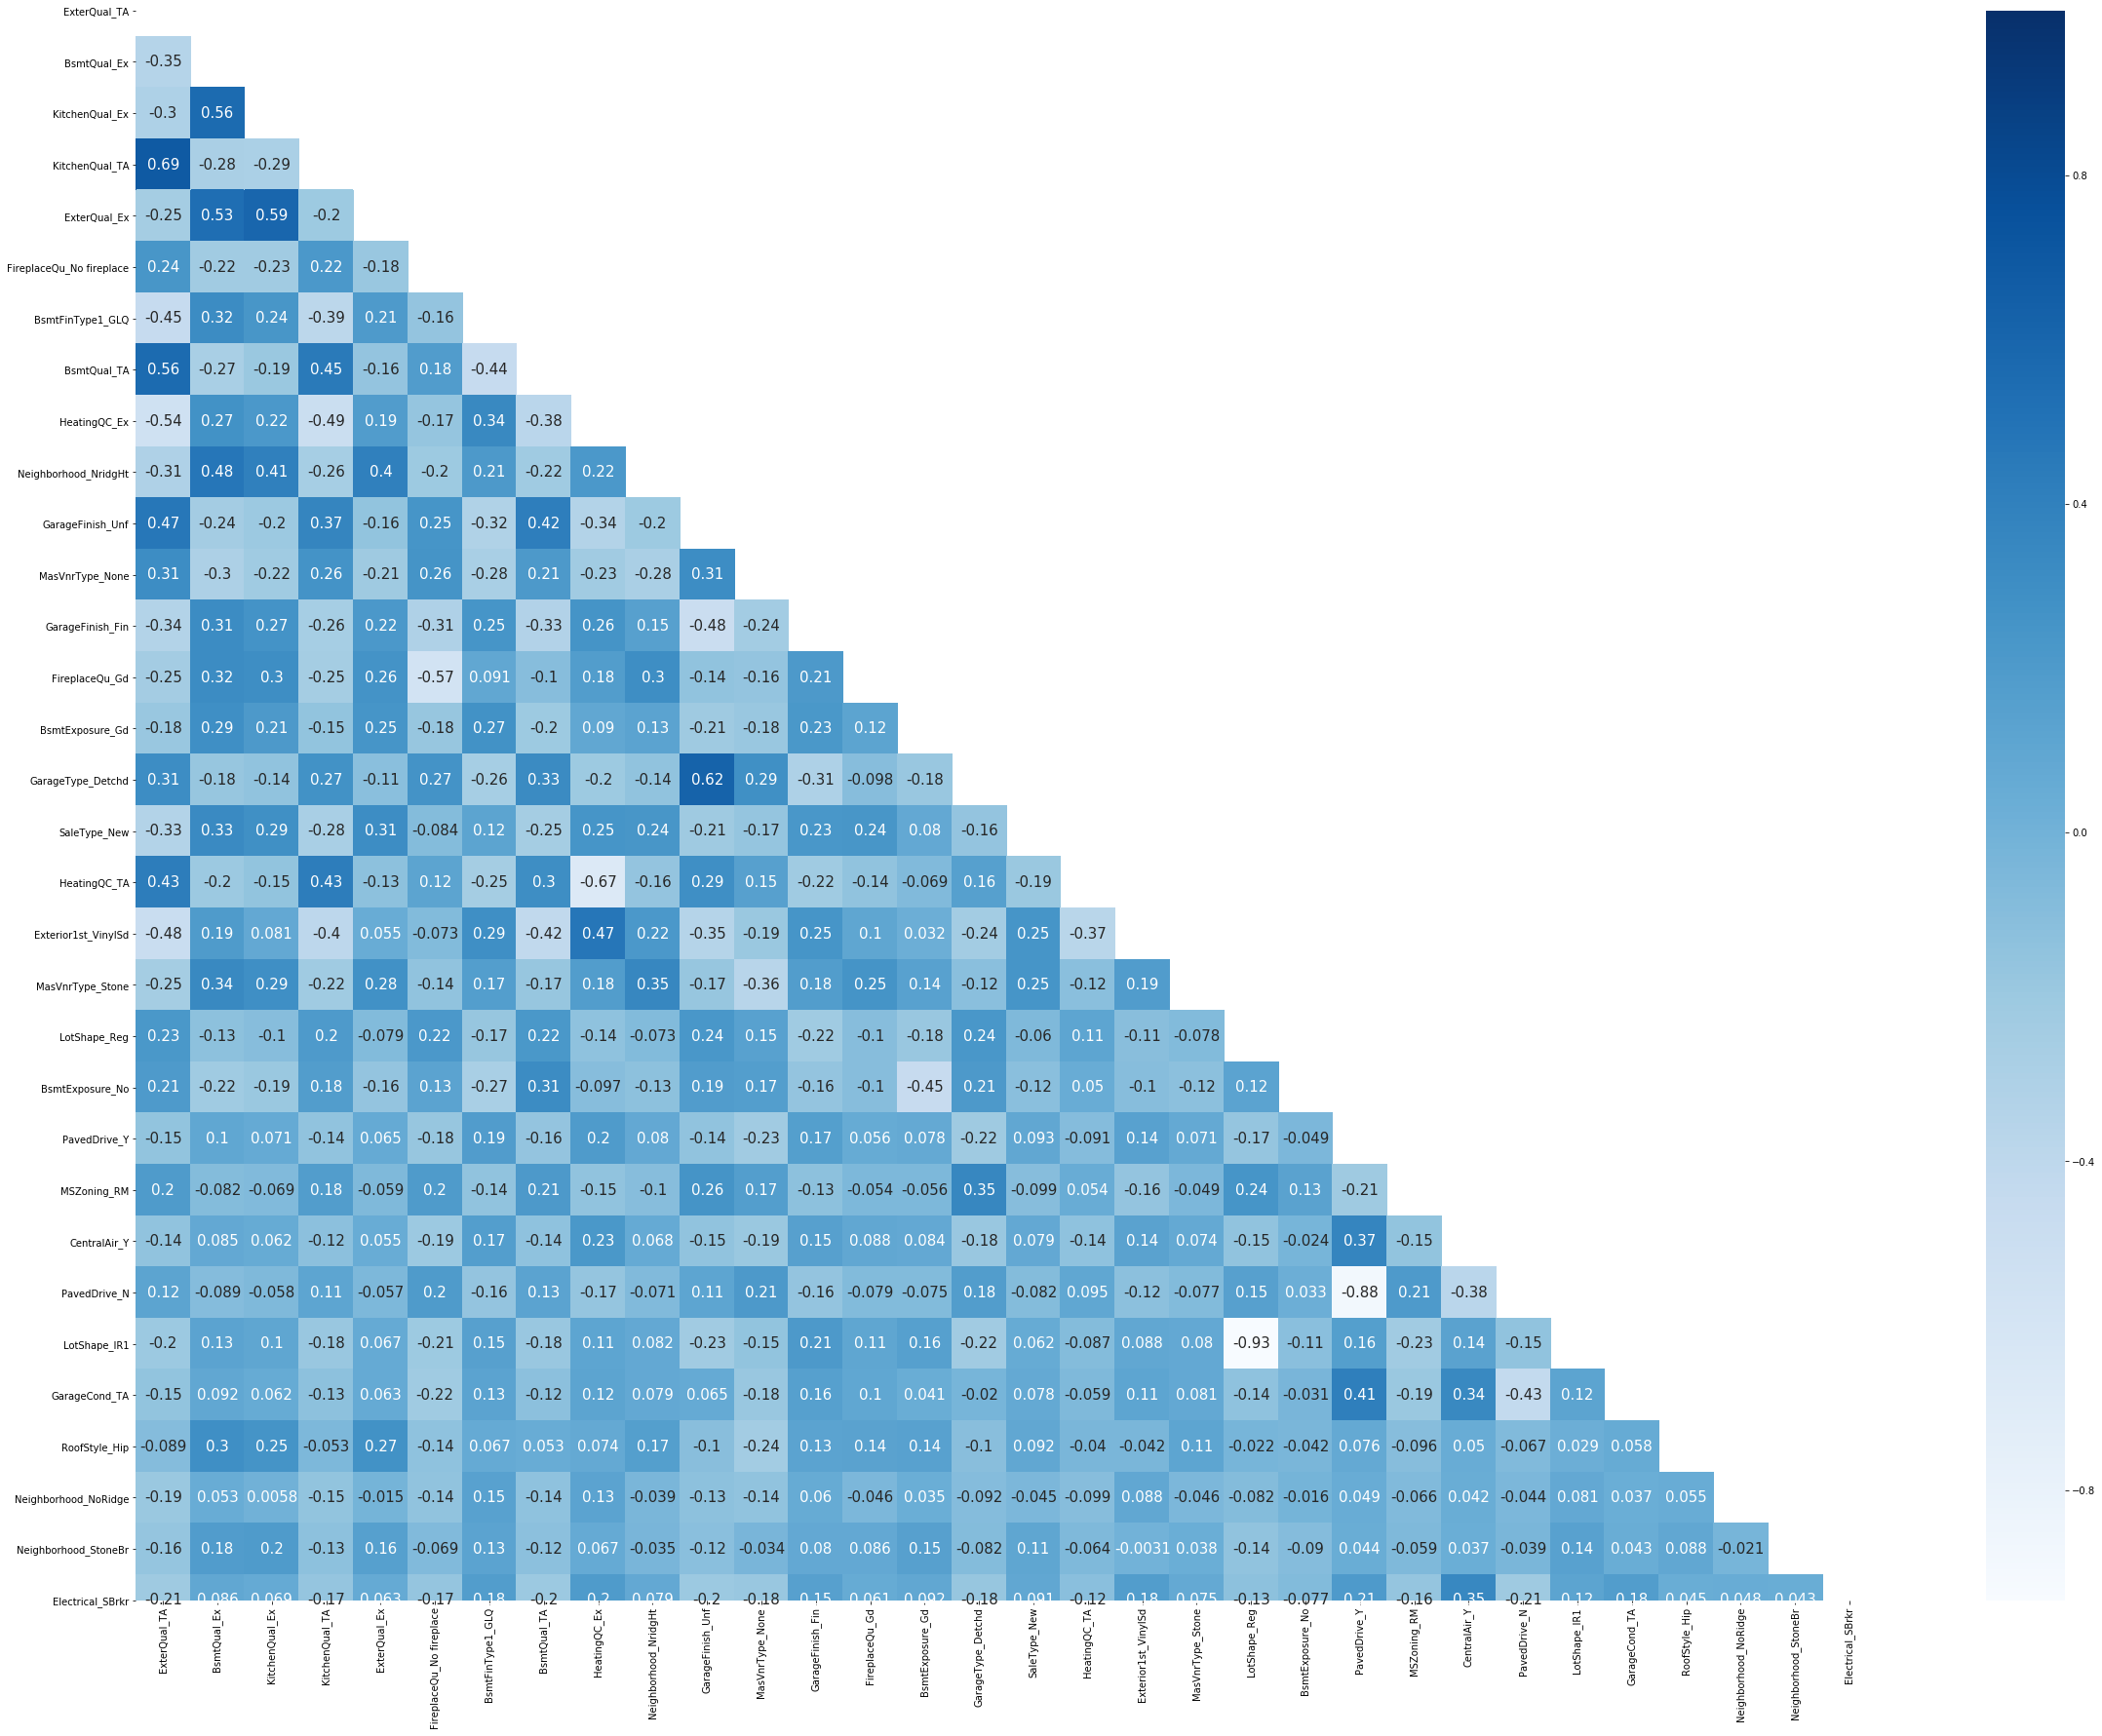

In [61]:
plt.figure(figsize = (40,30))
#plt.title('Heatmap')
matrix = np.triu(df3.corr())
sns.heatmap(df3.corr(),annot=True, mask = matrix, annot_kws={"size": 15},cmap='Blues')
#plt.savefig('Heatmap.png')

In [62]:
df3.columns

Index(['ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA',
       'ExterQual_Ex', 'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ',
       'BsmtQual_TA', 'HeatingQC_Ex', 'Neighborhood_NridgHt',
       'GarageFinish_Unf', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'MasVnrType_Stone', 'LotShape_Reg', 'BsmtExposure_No', 'PavedDrive_Y',
       'MSZoning_RM', 'CentralAir_Y', 'PavedDrive_N', 'LotShape_IR1',
       'GarageCond_TA', 'RoofStyle_Hip', 'Neighborhood_NoRidge',
       'Neighborhood_StoneBr', 'Electrical_SBrkr'],
      dtype='object')

In [63]:
df4=df3.drop(['LotShape_Reg','PavedDrive_Y'],axis=1)

In [64]:
df4.shape

(2051, 30)

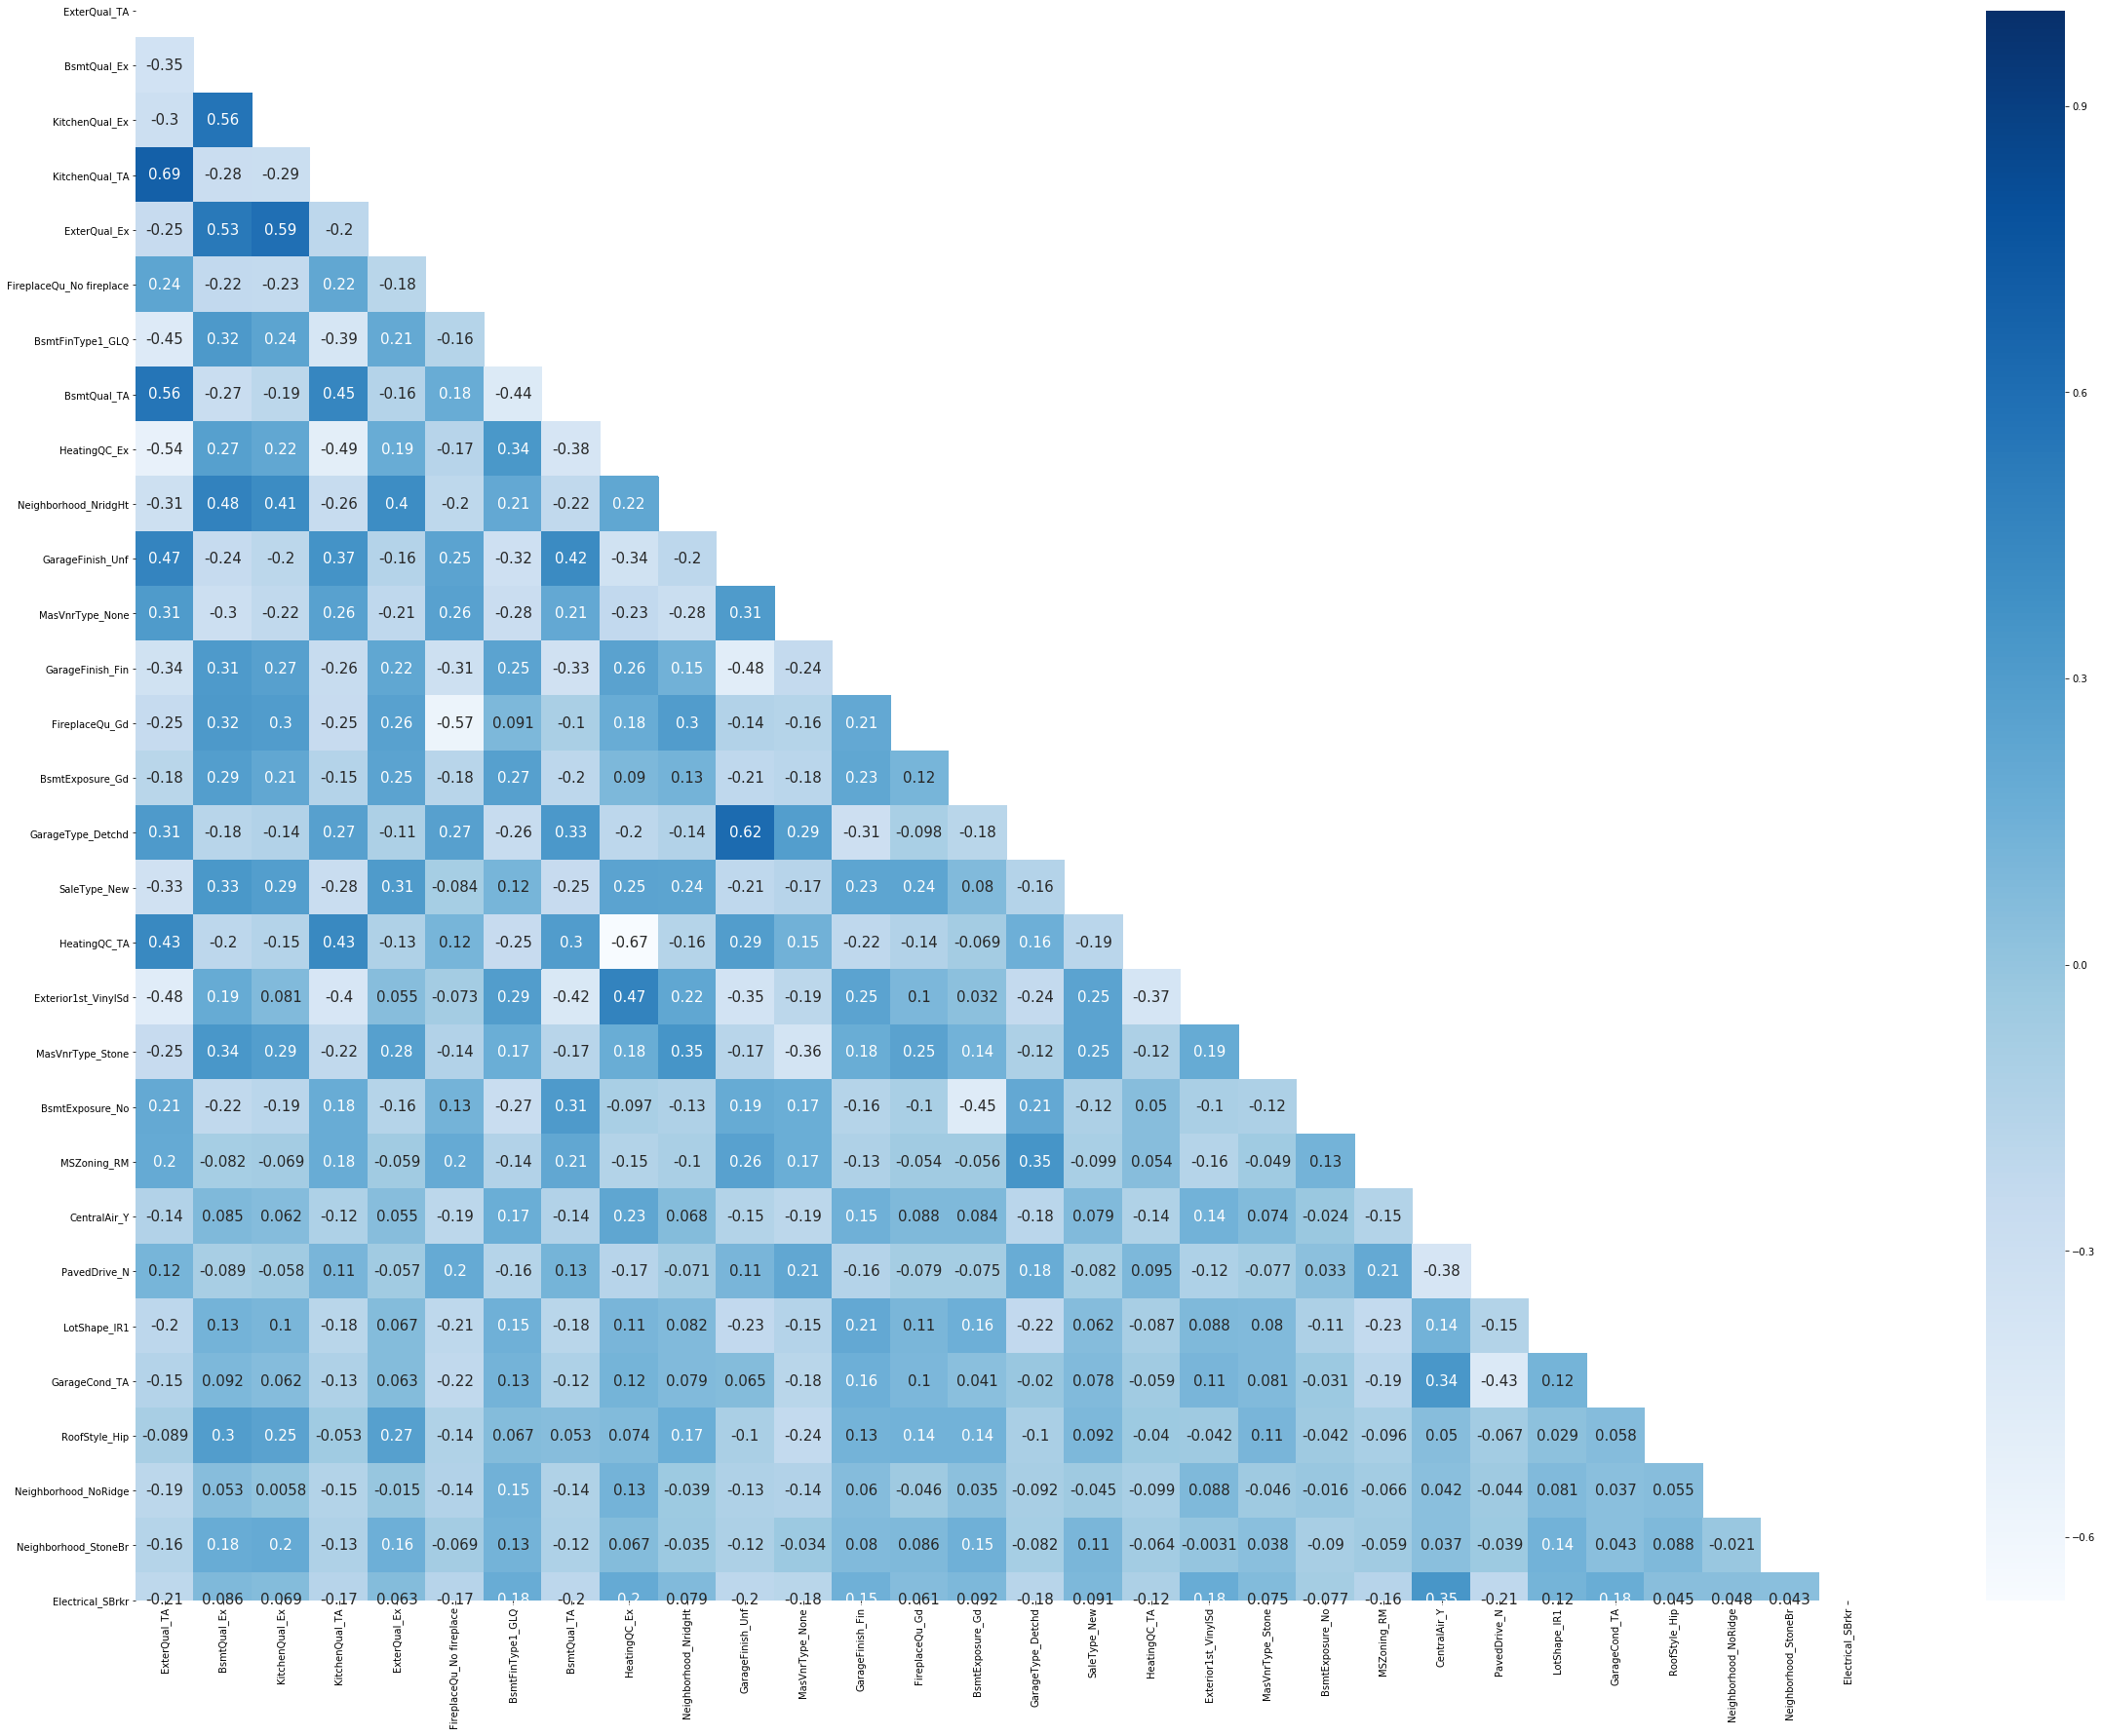

In [65]:
plt.figure(figsize = (40,30))
#plt.title('Heatmap')
matrix = np.triu(df4.corr())
sns.heatmap(df4.corr(),annot=True, mask = matrix, annot_kws={"size": 15},cmap='Blues')

In [66]:
df4.columns

Index(['ExterQual_TA', 'BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA',
       'ExterQual_Ex', 'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ',
       'BsmtQual_TA', 'HeatingQC_Ex', 'Neighborhood_NridgHt',
       'GarageFinish_Unf', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'MasVnrType_Stone', 'BsmtExposure_No', 'MSZoning_RM', 'CentralAir_Y',
       'PavedDrive_N', 'LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Electrical_SBrkr'],
      dtype='object')

In [67]:
#manually drop ['Id','PID']

## P value test for category variables

In [68]:
import statsmodels.api as sm
model = sm.OLS(df0['SalePrice'], df4).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1333.
Date:                Mon, 25 Nov 2019   Prob (F-statistic):                        0.00
Time:                        06:21:05   Log-Likelihood:                         -24813.
No. Observations:                2051   AIC:                                  4.969e+04
Df Residuals:                    2021   BIC:                                  4.985e+04
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ExterQual_TA              1949.2574   3176.226      0.614      0.539   -4279.763    8178.277
BsmtQual_Ex               3.021e+04   4818.669      6.269      0.000    2.08e+04    3.97e+04
KitchenQual_Ex            4.968e+04   5112.972      9.717      0.000    3.97e+04    5.97e+04
KitchenQual_TA           -1.165e+04   2805.543     -4.152      0.000   -1.72e+04   -6146.775
ExterQual_Ex              3.683e+04   6688.836      5.506      0.000    2.37e+04    4.99e+04
FireplaceQu_No fireplace -9804.9703   2518.919     -3.893      0.000   -1.47e+04   -4865.022
BsmtFinType1_GLQ          1.785e+04   2568.294      6.952      0.000    1.28e+04    2.29e+04
BsmtQual_TA               1553.4475   2631.569      0.590      0.555   -3607.423    6714.318
HeatingQC_Ex              2.048e+04   2857.246      7.169      0.000    1.49e+04    2.61e+04
Neighborhood_NridgHt      3.946e+04   5134.377      7.685      0.000    2.94e+04    4.95e+04
GarageFinish_Unf           383.6513   2999.297      0.128      0.898   -5498.386    6265.689
MasVnrType_None           6567.6321   2297.843      2.858      0.004    2061.244    1.11e+04
GarageFinish_Fin          1.089e+04   2773.506      3.925      0.000    5447.502    1.63e+04
FireplaceQu_Gd            1.579e+04   2906.334      5.434      0.000    1.01e+04    2.15e+04
BsmtExposure_Gd            3.89e+04   3836.960     10.138      0.000    3.14e+04    4.64e+04
GarageType_Detchd        -7926.6448   2980.127     -2.660      0.008   -1.38e+04   -2082.204
SaleType_New              1.889e+04   4152.957      4.548      0.000    1.07e+04     2.7e+04
HeatingQC_TA              9044.3209   2865.503      3.156      0.002    3424.672    1.47e+04
Exterior1st_VinylSd       1.365e+04   2543.158      5.368      0.000    8665.441    1.86e+04
MasVnrType_Stone          1372.1149   4088.891      0.336      0.737   -6646.766    9390.996
BsmtExposure_No           6392.3150   2362.977      2.705      0.007    1758.190     1.1e+04
MSZoning_RM              -6215.7176   3007.302     -2.067      0.039   -1.21e+04    -317.983
CentralAir_Y              4.964e+04   4236.499     11.718      0.000    4.13e+04     5.8e+04
PavedDrive_N              1.846e+04   4085.404      4.518      0.000    1.04e+04    2.65e+04
LotShape_IR1              1.011e+04   2189.410      4.617      0.000    5815.095    1.44e+04
GarageCond_TA             5.366e+04   3732.212     14.379      0.000    4.63e+04     6.1e+04
RoofStyle_Hip             1.139e+04   2696.247      4.225      0.000    6102.832    1.67e+04
Neighborhood_NoRidge      1.017e+05   6760.601     15.037      0.000    8.84e+04    1.15e+05
Neighborhood_StoneBr      6.033e+04   7645.377      7.892      0.000    4.53e+04    7.53e+04
Electric

In [69]:
#p value for 'GarageFinish_Unf', 'ExterQual_TA', 'BsmtQual_TA','MasVnrType_Stone' 
#are too high, drop it and try ols again

In [70]:
df5=df4.drop(['GarageFinish_Unf', 'ExterQual_TA', 'BsmtQual_TA','MasVnrType_Stone'],axis=1)

In [71]:
model = sm.OLS(df0['SalePrice'], df5).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1540.
Date:                Mon, 25 Nov 2019   Prob (F-statistic):                        0.00
Time:                        06:21:05   Log-Likelihood:                         -24813.
No. Observations:                2051   AIC:                                  4.968e+04
Df Residuals:                    2025   BIC:                                  4.982e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
BsmtQual_Ex               3.019e+04   4794.614      6.297      0.000    2.08e+04    3.96e+04
KitchenQual_Ex            4.991e+04   5100.401      9.785      0.000    3.99e+04    5.99e+04
KitchenQual_TA           -1.044e+04   2430.200     -4.295      0.000   -1.52e+04   -5671.870
ExterQual_Ex              3.682e+04   6675.431      5.515      0.000    2.37e+04    4.99e+04
FireplaceQu_No fireplace -9416.8783   2489.919     -3.782      0.000   -1.43e+04   -4533.809
BsmtFinType1_GLQ          1.737e+04   2515.499      6.906      0.000    1.24e+04    2.23e+04
HeatingQC_Ex              2.028e+04   2844.113      7.132      0.000    1.47e+04    2.59e+04
Neighborhood_NridgHt      3.928e+04   5066.969      7.753      0.000    2.93e+04    4.92e+04
MasVnrType_None           6568.5609   2202.030      2.983      0.003    2250.079    1.09e+04
GarageFinish_Fin           1.05e+04   2609.571      4.025      0.000    5384.991    1.56e+04
FireplaceQu_Gd            1.622e+04   2861.925      5.666      0.000    1.06e+04    2.18e+04
BsmtExposure_Gd           3.905e+04   3826.561     10.206      0.000    3.16e+04    4.66e+04
GarageType_Detchd        -7512.8037   2640.266     -2.845      0.004   -1.27e+04   -2334.882
SaleType_New              1.848e+04   4106.431      4.499      0.000    1.04e+04    2.65e+04
HeatingQC_TA              9330.0338   2846.854      3.277      0.001    3746.965    1.49e+04
Exterior1st_VinylSd        1.32e+04   2483.044      5.315      0.000    8328.638    1.81e+04
BsmtExposure_No           6819.8053   2307.104      2.956      0.003    2295.261    1.13e+04
MSZoning_RM              -5972.2674   2992.875     -1.995      0.046   -1.18e+04    -102.833
CentralAir_Y              5.026e+04   4184.201     12.011      0.000    4.21e+04    5.85e+04
PavedDrive_N              1.872e+04   4075.080      4.593      0.000    1.07e+04    2.67e+04
LotShape_IR1               1.01e+04   2186.461      4.618      0.000    5809.509    1.44e+04
GarageCond_TA             5.416e+04   3575.648     15.148      0.000    4.71e+04    6.12e+04
RoofStyle_Hip             1.166e+04   2658.277      4.388      0.000    6450.301    1.69e+04
Neighborhood_NoRidge      1.009e+05   6710.732     15.042      0.000    8.78e+04    1.14e+05
Neighborhood_StoneBr      5.952e+04   7592.778      7.839      0.000    4.46e+04    7.44e+04
Electrical_SBrkr          3.419e+04   3496.069      9.779      0.000    2.73e+04     4.1e+04
==============================================================================
Omnibus:                      302.853   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              979.707
Skew:                           0.736   Prob(JB): 

#### Features for category variables

In [72]:
features_c=df5.columns
features_c

Index(['BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'Neighborhood_NridgHt', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'BsmtExposure_No', 'MSZoning_RM', 'CentralAir_Y', 'PavedDrive_N',
       'LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Electrical_SBrkr'],
      dtype='object')

## Scaling our numerical features
---

In [73]:
df.shape

(2051, 81)

In [74]:
df.drop(['Id', 'PID'],axis=1,inplace=True)

In [75]:
df.select_dtypes(['float']).columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [76]:
df.select_dtypes(['int']).columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemod/Add', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [77]:
X0=df[['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt','MSSubClass', 'LotArea',
     'OverallQual', 'OverallCond', 'YearBuilt','YearRemod/Add', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice','GarageCars', 'GarageArea']]

In [78]:
y=df0['SalePrice']

In [79]:
X0.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,MSSubClass,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,GarageCars,GarageArea
0,0.0,289.0,533.0,0.0,192.0,725.0,0.0,0.0,1976.0,60,...,0,0,0,0,0,3,2010,130500,2.0,475.0
1,43.0,132.0,637.0,0.0,276.0,913.0,1.0,0.0,1997.0,60,...,0,0,0,0,0,4,2009,220000,2.0,559.0
2,68.0,0.0,731.0,0.0,326.0,1057.0,1.0,0.0,1953.0,20,...,0,0,0,0,0,1,2010,109000,1.0,246.0
3,73.0,0.0,0.0,0.0,384.0,384.0,0.0,0.0,2007.0,60,...,0,0,0,0,0,4,2010,174000,2.0,400.0
4,82.0,0.0,0.0,0.0,676.0,676.0,0.0,0.0,1957.0,50,...,0,0,0,0,0,3,2010,138500,2.0,484.0


In [80]:
ss=StandardScaler()
X0_ss=ss.fit_transform(X0)

## Feature selection for numerical variables
---

In [81]:
from sklearn.feature_selection import RFE

In [82]:
'''nof_list=np.arange(1,10)            
high_score=0#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_rfe = rfe.fit_transform(X_ss,y)
    score = model.score(X_rfe,y)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]'''

'nof_list=np.arange(1,10)            \nhigh_score=0#Variable to store the optimum features\nnof=0           \nscore_list =[]\nfor n in range(len(nof_list)):\n    model = LinearRegression()\n    rfe = RFE(model,nof_list[n])\n    X_rfe = rfe.fit_transform(X_ss,y)\n    score = model.score(X_rfe,y)\n    score_list.append(score)\n    if(score>high_score):\n        high_score = score\n        nof = nof_list[n]'

In [83]:
model = LinearRegression()#Initializing RFE model
rfe = RFE(model, 25) #Transforming data ussing RFE
X0_rfe = rfe.fit_transform(X0_ss,y)  #Fitting the data to model
model.fit(X0_rfe,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
X1=X0[X0.columns[rfe.support_]]

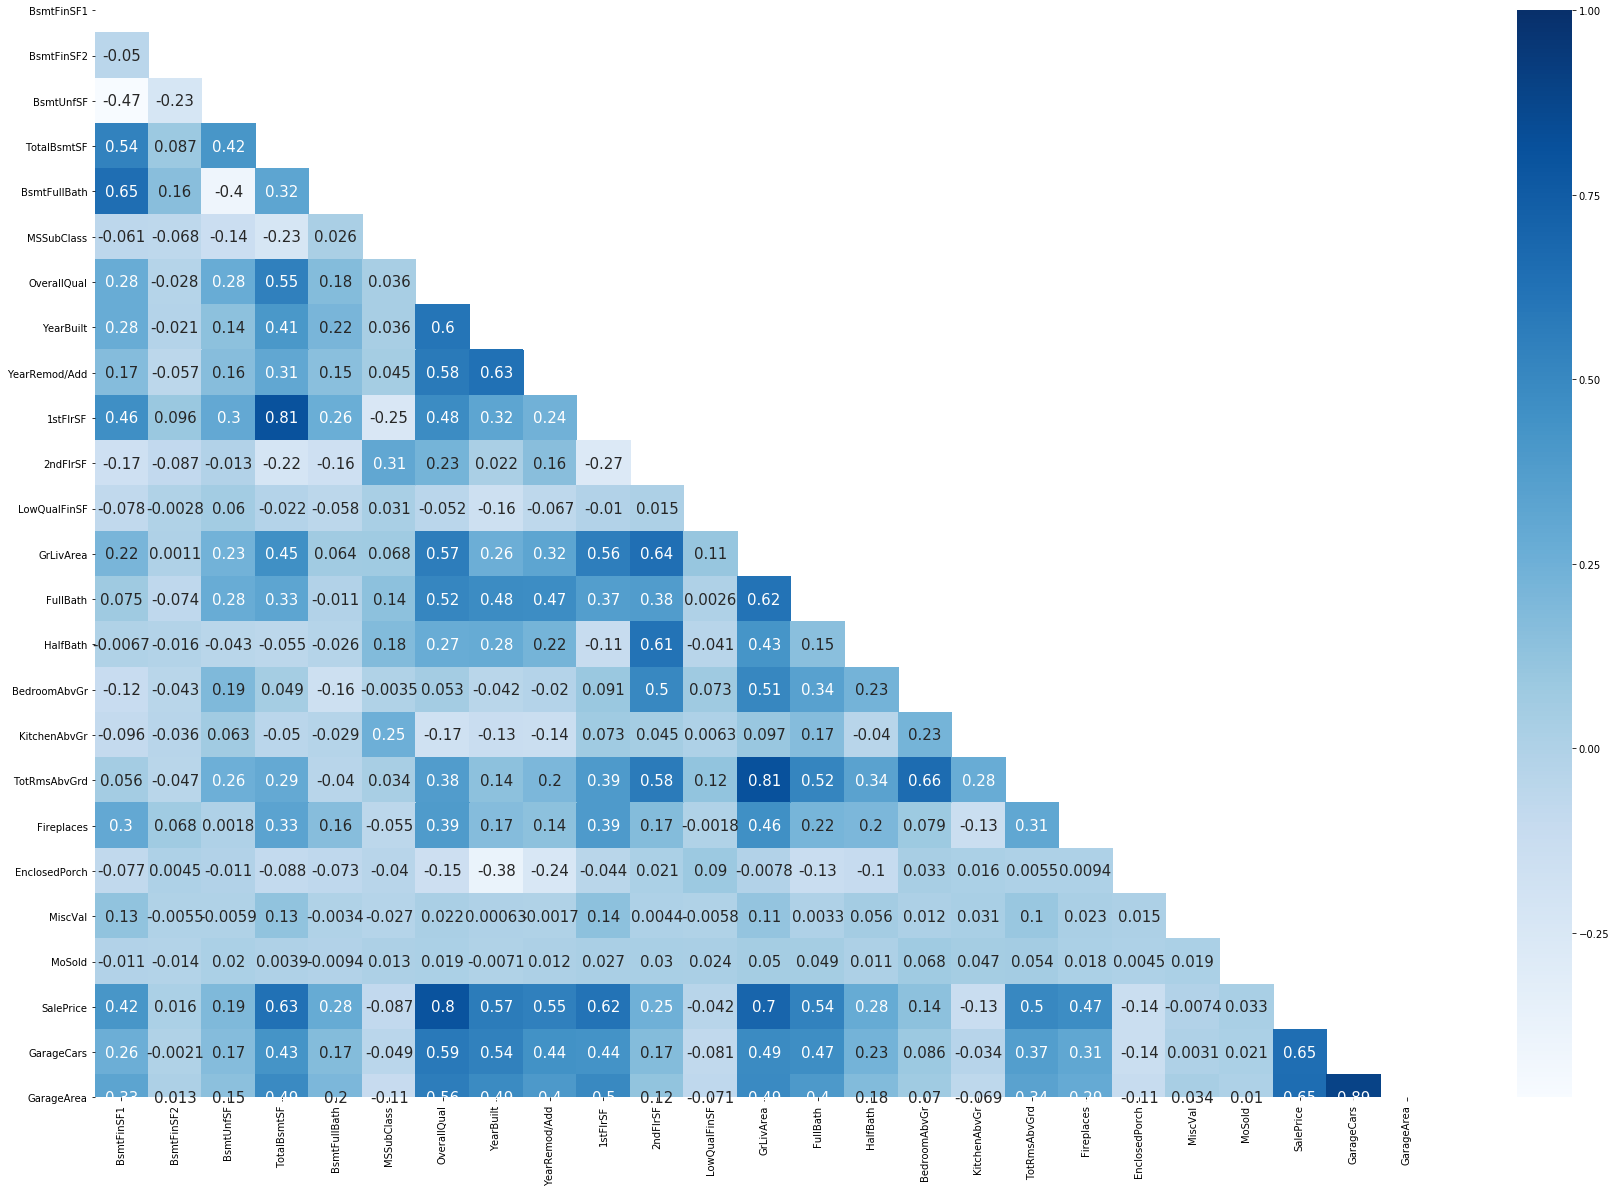

In [85]:
plt.figure(figsize = (30,20))
#plt.title('Heatmap')
matrix = np.triu(X1.corr())
sns.heatmap(X1.corr(),annot=True, mask = matrix, annot_kws={"size": 15},cmap='Blues')

In [86]:
X1.columns

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'MSSubClass', 'OverallQual', 'YearBuilt', 'YearRemod/Add', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'EnclosedPorch', 'MiscVal', 'MoSold', 'SalePrice', 'GarageCars',
       'GarageArea'],
      dtype='object')

In [87]:
model = sm.OLS(df0['SalePrice'], X1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.291e+32
Date:                Mon, 25 Nov 2019   Prob (F-statistic):                        0.00
Time:                        06:21:07   Log-Likelihood:                          43306.
No. Observations:                2051   AIC:                                 -8.657e+04
Df Residuals:                    2028   BIC:                                 -8.644e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BsmtFinSF1      1.03e-13   9.75e-15     10.570      0.000    8.39e-14    1.22e-13
BsmtFinSF2    -1.119e-13   1.73e-14     -6.456      0.000   -1.46e-13   -7.79e-14
BsmtUnfSF     -1.066e-14      9e-15     -1.184      0.237   -2.83e-14    6.99e-15
TotalBsmtSF   -2.665e-15   1.28e-14     -0.208      0.835   -2.78e-14    2.25e-14
BsmtFullBath   1.364e-11   9.71e-12      1.405      0.160   -5.41e-12    3.27e-11
MSSubClass     1.847e-13   1.02e-13      1.809      0.071   -1.56e-14    3.85e-13
OverallQual   -7.276e-12   4.77e-12     -1.527      0.127   -1.66e-11    2.07e-12
YearBuilt              0   1.83e-13          0      1.000   -3.59e-13    3.59e-13
YearRemod/Add  5.684e-14    1.8e-13      0.316      0.752   -2.96e-13     4.1e-13
1stFlrSF       6.661e-14   2.29e-14      2.903      0.004    2.16e-14    1.12e-13
2ndFlrSF      -6.439e-15   2.14e-14     -0.301      0.763   -4.83e-14    3.55e-14
LowQualFinSF   -6.75e-14   5.53e-14     -1.220      0.223   -1.76e-13     4.1e-14
GrLivArea     -1.954e-14   2.18e-14     -0.898      0.369   -6.22e-14    2.31e-14
FullBath       9.095e-12   9.91e-12      0.918      0.359   -1.03e-11    2.85e-11
HalfBath      -2.592e-11   1.03e-11     -2.521      0.012   -4.61e-11   -5.76e-12
BedroomAbvGr   7.276e-12   6.53e-12      1.114      0.266   -5.54e-12    2.01e-11
KitchenAbvGr  -3.274e-11   2.13e-11     -1.536      0.125   -7.45e-11    9.06e-12
TotRmsAbvGrd  -2.728e-12   4.92e-12     -0.554      0.579   -1.24e-11    6.92e-12
Fireplaces    -6.366e-12   6.94e-12     -0.917      0.359      -2e-11    7.25e-12
EnclosedPorch  7.105e-14   6.42e-14      1.106      0.269   -5.49e-14    1.97e-13
MiscVal        1.332e-14   6.68e-15      1.995      0.046    2.25e-16    2.64e-14
MoSold         2.046e-12   1.33e-12      1.538      0.124   -5.64e-13    4.66e-12
SalePrice         1.0000   1.07e-16   9.39e+15      0.000       1.000       1.000
GarageCars    -1.819e-12   1.15e-11     -0.158      0.875   -2.44e-11    2.08e-11
GarageArea     1.421e-14   4.04e-14      0.352      0.725    -6.5e-14    9.34e-14
==============================================================================
Omnibus:                      684.695   Durbin-Watson:                   0.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6039.159
Skew:                          -1.315   Prob(JB):                         0.00
Kurtosis:                      10.985   Cond. No.                     4.00e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.03e-24. This might indicate that there are
strong multicollinearity problems o

#### Features for numerical variables

In [88]:
features_n=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','OverallQual','3SsnPorch']

### Final features list=continous variables+category variables

In [89]:
features_c

Index(['BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'HeatingQC_Ex',
       'Neighborhood_NridgHt', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd',
       'SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'BsmtExposure_No', 'MSZoning_RM', 'CentralAir_Y', 'PavedDrive_N',
       'LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Electrical_SBrkr'],
      dtype='object')

In [90]:
features_final=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','OverallQual','3SsnPorch']+['BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'Neighborhood_NridgHt', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd','SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'BsmtExposure_No', 'MSZoning_RM', 'CentralAir_Y', 'PavedDrive_N','LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Electrical_SBrkr']

In [91]:
len(features_final)

31

## Model Prep: Create our features matrix (`X`) and target vector (`y`)
---

In [92]:
X = df0[features_final]
y = df0['SalePrice']

In [93]:
X.shape

(2051, 31)

In [94]:
y.shape

(2051,)

## Model Prep: Scaling
---

In [95]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

## Train/test split

In [96]:
X_ss_train, X_ss_test, y_train, y_test = train_test_split(X_ss, y, random_state=42)

## Model Fitting
---

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(X_ss_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
predictions=lr.predict(X_ss_test)
score=lr.score(X_ss_test,y_test)

In [100]:
score

0.8127207595487121

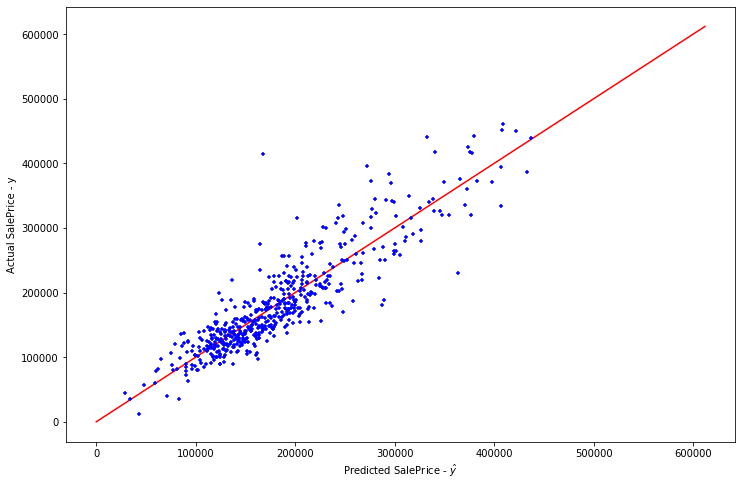

<Figure size 432x288 with 0 Axes>

In [101]:
plt.figure(figsize=(12,8))
plt.scatter(predictions, y_test, s=20, c='b', marker='+', zorder=8)
plt.xlabel("Predicted SalePrice - $\hat{y}$")
plt.ylabel("Actual SalePrice - y")

plt.plot([0, np.max(y)], [0, np.max(y)], c = 'r')

plt.show()
plt.savefig('y-yhat')

#### RMSE for Linear model

In [102]:
np.sqrt(((predictions - y_test) ** 2).mean())

33910.16319401534

## Cross validation

In [103]:
lr_scores = cross_val_score(lr, X_ss, y, cv=5)
lr_scores

array([0.83545938, 0.84751566, 0.77140566, 0.80037771, 0.77218107])

In [104]:
lr_scores.mean()

0.8053878949236877

## Model Prep: Instantiate our models
---

Evaluate `LassoCV` and `RidgeCV`

In [105]:
lasso = LassoCV(n_alphas=200)

In [106]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross validation for train part of the training data
---

Use `cross_val_score` to evaluate all three models.

In [107]:
lr_scores = cross_val_score(lr, X_ss_train, y_train, cv=5)
lr_scores.mean()

0.7897625227277056

In [108]:
lasso_scores = cross_val_score(lasso, X_ss_train, y_train, cv=5)
lasso_scores.mean()

/Users/fionna/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fionna/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fionna/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/fionna/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to s

0.7892002072045241

In [109]:
ridge_scores = cross_val_score(ridge, X_ss_train, y_train, cv=5)
ridge_scores.mean()

0.7901671754674358

## Other Model Fitting and Evaluation
---

`RidgeCV` seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.

In [110]:
ridge.fit(X_ss_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [111]:
ridge.score(X_ss_train, y_train)

0.8124720411822483

In [112]:
ridge.score(X_ss_test, y_test)

0.8126959706532456

In [113]:
ridge_scores.mean()

0.7901671754674358

###### R2 for ridge model

In [114]:
pred = ridge.predict(X_ss_test)

In [115]:
r2_score(y_test, pred)

0.8126959706532455

In [116]:
np.sqrt(((pred - y_test) ** 2).mean())#RMSE for Ridge

33912.40735005337

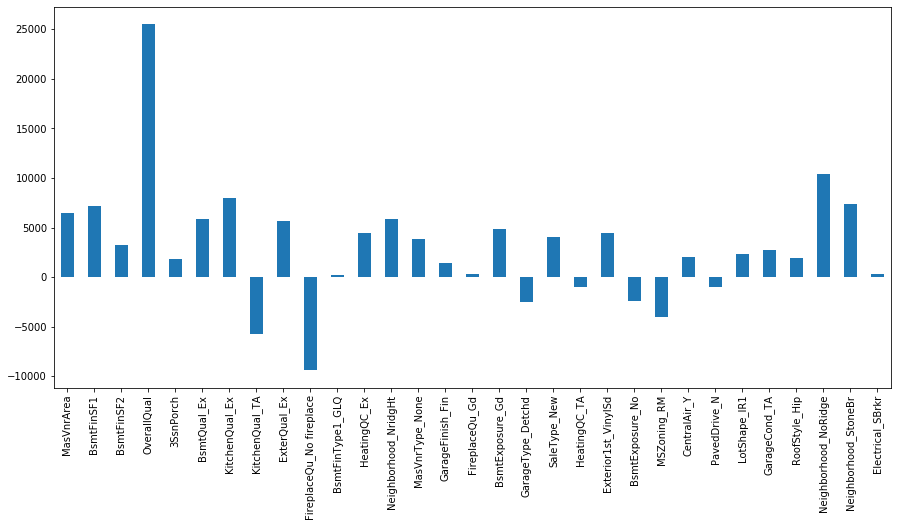

In [117]:
pd.Series(ridge.coef_, index=features_final).plot.bar(figsize=(15, 7))

In [118]:
residuals = y_test - pred

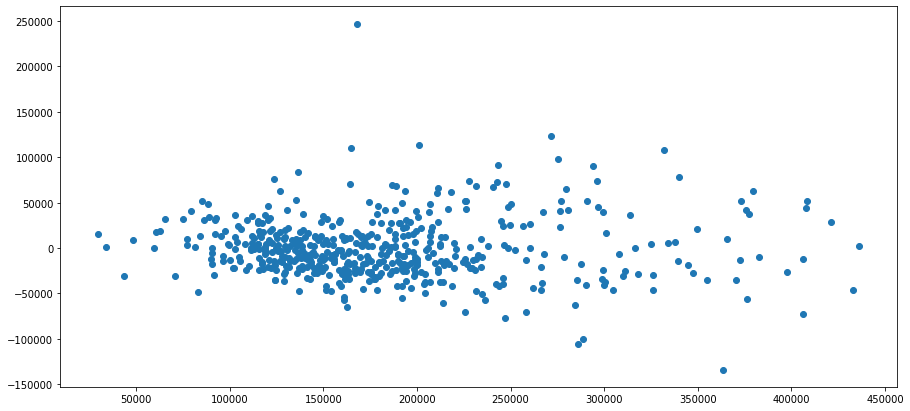

In [119]:
plt.figure(figsize=(15,7))
plt.scatter(pred, residuals)

# Part II: Use model to predict real test 

## Test data cleaning

In [120]:
df_t = pd.read_csv('./datasets/test.csv')

In [121]:
df_t.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [122]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 80 columns):
Id                 879 non-null int64
PID                879 non-null int64
MS SubClass        879 non-null int64
MS Zoning          879 non-null object
Lot Frontage       719 non-null float64
Lot Area           879 non-null int64
Street             879 non-null object
Alley              58 non-null object
Lot Shape          879 non-null object
Land Contour       879 non-null object
Utilities          879 non-null object
Lot Config         879 non-null object
Land Slope         879 non-null object
Neighborhood       879 non-null object
Condition 1        879 non-null object
Condition 2        879 non-null object
Bldg Type          879 non-null object
House Style        879 non-null object
Overall Qual       879 non-null int64
Overall Cond       879 non-null int64
Year Built         879 non-null int64
Year Remod/Add     879 non-null int64
Roof Style         879 non-null object
Roof M

In [123]:
df_t.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              821
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [124]:
features_final=['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','OverallQual','3SsnPorch']+['BsmtQual_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'ExterQual_Ex',
       'FireplaceQu_No fireplace', 'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'Neighborhood_NridgHt', 'MasVnrType_None', 'GarageFinish_Fin',
       'FireplaceQu_Gd', 'BsmtExposure_Gd', 'GarageType_Detchd','SaleType_New', 'HeatingQC_TA', 'Exterior1st_VinylSd',
       'BsmtExposure_No', 'MSZoning_RM', 'CentralAir_Y', 'PavedDrive_N','LotShape_IR1', 'GarageCond_TA', 'RoofStyle_Hip',
       'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Electrical_SBrkr']

In [125]:
df_t.columns = df_t.columns.str.replace(' ', '')

In [126]:
df_t['PoolQC'] = df_t['PoolQC'].replace({np.nan: 'No pool'})
df_t['MiscFeature'] = df_t['MiscFeature'].replace({np.nan: 'No misc. features'})
df_t['Fence'] = df_t['Fence'].replace({np.nan: 'No fence'})
df_t['Alley'] =df_t['Alley'].replace({np.nan: 'No alley'})
df_t['FireplaceQu'] = df_t['FireplaceQu'].replace({np.nan: 'No fireplace'})
df_t['GarageFinish'] = df_t['GarageFinish'].replace({np.nan: 'No garage'})
df_t['GarageCond'] = df_t['GarageCond'].replace({np.nan: 'No garage'})
df_t['GarageQual'] = df_t['GarageQual'].replace({np.nan: 'No garage'})
df_t['GarageType'] = df_t['GarageType'].replace({np.nan: 'No garage'})
df_t['BsmtCond'] = df_t['BsmtCond'].replace({np.nan: 'No basement'})
df_t['BsmtExposure'] = df_t['BsmtExposure'].replace({np.nan: 'No basement'})
df_t['BsmtQual'] = df_t['BsmtQual'].replace({np.nan: 'No basement'})
df_t['BsmtFinType2'] = df_t['BsmtFinType2'].replace({np.nan: 'No basement'})
df_t['BsmtFinType1'] = df_t['BsmtFinType1'].replace({np.nan: 'No basement'})
df_t['MasVnrType'] = df_t['MasVnrType'].replace({np.nan: 'No masonry'})
df_t['Electrical'] = df_t['Electrical'].replace({np.nan: 'No Electrical'})
df_t['LotFrontage'] = df_t['LotFrontage'].fillna(0)
df_t['GarageYrBlt'] = df_t['GarageYrBlt'].fillna(0)
df_t['MasVnrArea'] = df_t['MasVnrArea'].fillna(0)

In [127]:
df_t.isnull().sum()

Id               0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemod/Add    0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr

In [128]:
df_t.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

In [129]:
df_t0=pd.get_dummies(df_t, prefix=['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'])

In [130]:
X_real_test = df_t0[features_final]

In [131]:
X_real_test.isnull().sum()

MasVnrArea                  0
BsmtFinSF1                  0
BsmtFinSF2                  0
OverallQual                 0
3SsnPorch                   0
BsmtQual_Ex                 0
KitchenQual_Ex              0
KitchenQual_TA              0
ExterQual_Ex                0
FireplaceQu_No fireplace    0
BsmtFinType1_GLQ            0
HeatingQC_Ex                0
Neighborhood_NridgHt        0
MasVnrType_None             0
GarageFinish_Fin            0
FireplaceQu_Gd              0
BsmtExposure_Gd             0
GarageType_Detchd           0
SaleType_New                0
HeatingQC_TA                0
Exterior1st_VinylSd         0
BsmtExposure_No             0
MSZoning_RM                 0
CentralAir_Y                0
PavedDrive_N                0
LotShape_IR1                0
GarageCond_TA               0
RoofStyle_Hip               0
Neighborhood_NoRidge        0
Neighborhood_StoneBr        0
Electrical_SBrkr            0
dtype: int64

In [138]:
ss = StandardScaler()
X_ss_real_test = ss.fit_transform(X_real_test)

In [133]:
predictions=lr.predict(X_ss_real_test)

In [134]:
sub_reg = pd.DataFrame()
sub_reg["SalePrice"] = predictions

In [135]:
sub_reg

,SalePrice
0,113751.111095
1,124685.786280
2,238979.663698
3,96376.813247
4,172160.815527
...,...
874,172274.438724
875,202059.923239
876,164349.765408
877,102354.000387


In [136]:
sub_reg.to_csv('sub_reg_result')